In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

## Gradient_Descent

In [8]:
df= pd.read_csv('regr.txt',sep=' ',header=None,names=['f','t'])

In [9]:
df

,f,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568
...,...,...
85,0.95,1.98410
86,0.96,2.00660
87,0.97,2.04930
88,0.98,2.05030


In [48]:
f= df['f'].values
t=df['t'].values

In [34]:
tsq=t*t
tsq

array([0.4761552 , 0.4829833 , 0.55133595, 0.56791296, 0.69836106,
       0.75323305, 0.70866091, 0.72895736, 0.73551206, 0.78127921,
       0.80973002, 0.96896461, 1.04939536, 1.11767184, 0.98162519,
       1.01163364, 1.15068529, 1.19749249, 1.30690624, 1.21992025,
       1.40825689, 1.29618225, 1.49940025, 1.53908836, 1.45709041,
       1.60224964, 1.68870025, 1.72712164, 1.60351569, 1.58206084,
       1.68766081, 1.70511364, 1.81656484, 1.82412036, 1.97233936,
       1.94546704, 1.9044    , 2.096704  , 2.00732224, 2.16648961,
       2.14798336, 2.07331201, 2.30250276, 2.24640144, 2.17592001,
       2.34886276, 2.33998209, 2.36298384, 2.59016836, 2.67387904,
       2.51000649, 2.76989449, 2.55584169, 2.75062225, 2.66244489,
       2.91521476, 2.77355716, 2.73935601, 2.87777296, 2.93882449,
       3.13502436, 3.10534884, 2.979076  , 3.27211921, 3.20589025,
       3.03735184, 3.37861161, 3.30585124, 3.19158225, 3.23820025,
       3.34743616, 3.46890625, 3.46816129, 3.37934689, 3.45699

In [7]:
f

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])

In [45]:
m,c=0,0
lr=0.01

In [46]:
def train(x,y,m,c,eta):
    const= -2.0/len(y)
    y_pred= m*x+c
    delt_m= const*sum(x*(y-y_pred))
    delt_c= const*sum(y-y_pred)
    m=m-eta*delt_m
    c=c-eta*delt_c
    error= sum((y-y_pred)**2)/len(y)
    return m,c,error
def train_all_values(x,y,m,c,eta,iterations=100):
    for i in range(iterations):
          m,c,err= train(x,y,m,c,eta)
    return m,c,err    

m=2.549 c=0.122 error=0.08703
m=2.418 c=0.1369 error=0.06792
m=2.321 c=0.1881 error=0.05592
m=2.235 c=0.2371 error=0.04616
m=2.158 c=0.2814 error=0.03822
m=2.088 c=0.3214 error=0.03176
m=2.026 c=0.3575 error=0.0265
m=1.969 c=0.39 error=0.02221
m=1.918 c=0.4194 error=0.01872
m=1.872 c=0.4459 error=0.01589


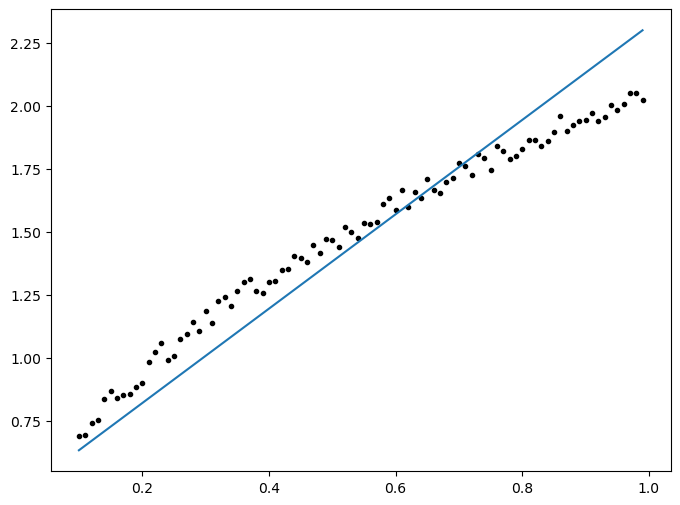

In [49]:
fig= plt.figure(figsize=(8,6))
ax= fig.add_subplot(1,1,1)
for i in range(10):
    m,c,error= train_all_values(f,t,m,c,lr,iterations=100)
    print('m={0:.4} c={1:.4} error={2:.4}'.format(m,c,error))
    ax.clear()
    y=m*f+c
    ax.plot(f,t,'.k')
    ax.plot(f,y)

In [44]:
name='ajay'
age=32

In [28]:
print('{0:.6} is {1} years old'.format(name,age))

ajay is 32 years old


In [50]:
## Finding the optimum value of the parameters

Text(0.5, 1.0, 'Gradient_Descent')

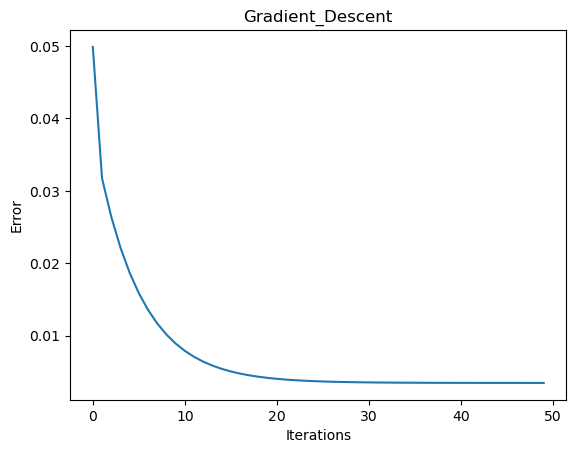

In [60]:
ms=[]
cs=[]
err1=[]
m,c=0,0
lr=0.01
for i in range(50):
    m,c,err= train_all_values(f,t,m,c,lr,iterations=100)
    ms.append(m)
    cs.append(c)
    err1.append(err)
iterations= range(50)
plt.plot(iterations,err1)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Gradient_Descent')